# The Covariance Matrix

Consider a set of observed data, for example the Iris dataset.

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
X = pd.DataFrame(X)

In [7]:
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
X.sample(5, random_state=10)

,0,1,2,3
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2


If we center this matrix of observed values, that is subtract the mean of column from each column, then this represents how far off from the mean of the observed values, a given value was. 

In [8]:
X_c = X - X.mean()

In [9]:
X_c.sample(5, random_state=10)

,0,1,2,3
87,0.456667,-0.754,0.641333,0.101333
111,0.556667,-0.354,1.541333,0.701333
10,-0.443333,0.646,-2.258667,-0.998667
91,0.256667,-0.054,0.841333,0.201333
49,-0.843333,0.246,-2.358667,-0.998667


## Total Sum of Squares

You might recall from our discussion of linear models and loss functions that this is closely related to the TSS, the **total sum of squares**. 

https://en.wikipedia.org/wiki/Total_sum_of_squares

$$\text{TSS} = \sum (x_i -\bar{x})^2 = (\mathbf{x} - \mathbf{\bar{x}})^T(\mathbf{x} - \mathbf{\bar{x}})$$

for a given feature vector, $\mathbf{x}$.

Here, $\bar{x}$ represents the mean value of $\mathbf{x}$ and $\mathbf{\bar{x}}$ represents a vector of the same size as $\mathbf{x}$ with each element equal to $\bar{x}$.

In pure python:

In [10]:
xx = [1,2,3,4,5]
x_bar = sum(xx)/len(xx)

In [11]:
x_bar

3.0

In [12]:
x_c = [x_i - x_bar for x_i in xx]

In [13]:
x_c

[-2.0, -1.0, 0.0, 1.0, 2.0]

In [18]:
TSS = sum([x_i*x_i for x_i in x_c])
TSS


10.0

If we perform these dot products on our centered data, we have the TSS for each feature.

In [19]:
TSS_0 = X_c[0].dot(X_c[0])
TSS_1 = X_c[1].dot(X_c[1])
TSS_2 = X_c[2].dot(X_c[2])
TSS_3 = X_c[3].dot(X_c[3])
TSS_0, TSS_1, TSS_2, TSS_3

(102.16833333333336,
 28.012599999999999,
 463.86373333333336,
 86.779733333333326)

## Variance

If we divide TSS by the number of items in the vector, we have the variance of feature.

In [21]:
n = X_c.shape[0]
n

150

In [22]:
pd.Series.var

<function pandas.core.series.Series.var>

In [23]:
var_0 = TSS_0/n
var_0, X_c[0].var(ddof=0)

(0.68112222222222241, 0.6811222222222223)

In [24]:
var_1 = TSS_1/n
var_1, X_c[1].var(ddof=0)

(0.18675066666666665, 0.18675066666666665)

In [25]:
X_c[1].var()

0.18800402684563758

Note that we had to specify a `ddof` of 0. The default is a `ddof` of 1, corresponding to a scaling by `n-1`, that is the [sample correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).

In [26]:
var_0 = TSS_0/(n-1)
var_0, X_c[0].var()

(0.6856935123042508, 0.68569351230425057)

In [27]:
var_1 = TSS_1/(n-1)
var_1, X_c[1].var()

(0.18800402684563758, 0.18800402684563758)

$$\text{TSS} = n\text{Var}(x) = n\sigma^2$$

## Covariance

We can find the covariance by multiplying two different centered features and dividing by the number of features.

This is available by the `pandas.DataFrame` argument `.cov()`. Note that by default, this is done using `n-1`.

In [30]:
X_c.cov()

,0,1,2,3
0,0.685694,-0.039268,1.273682,0.516904
1,-0.039268,0.188004,-0.321713,-0.117981
2,1.273682,-0.321713,3.113179,1.296387
3,0.516904,-0.117981,1.296387,0.582414


In [31]:
X_c[0].dot(X_c[1])/(n-1)

-0.039268456375838909

In [32]:
import seaborn as sns


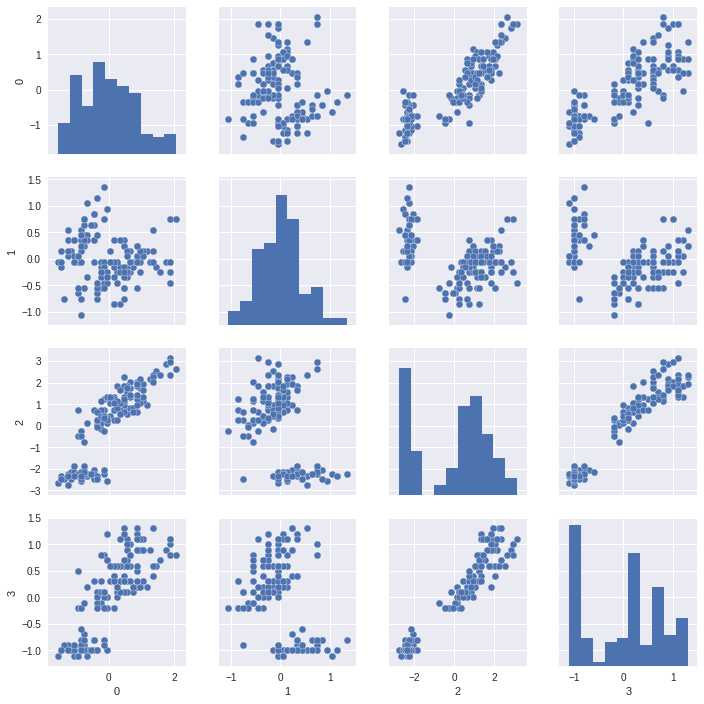

In [23]:
sns.pairplot(X_c)

`pandas.DataFrame.cov()` return a **Covariance Matrix** consisting of the respective sample covariances between each feature. Note that the diagonal contains the variances, which is to say that the covariance between a feature and itself is the variance of that feature. 

## Interpretation in terms of Single Variable Regression

In [41]:
X_c.columns = iris.feature_names
X_c.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667


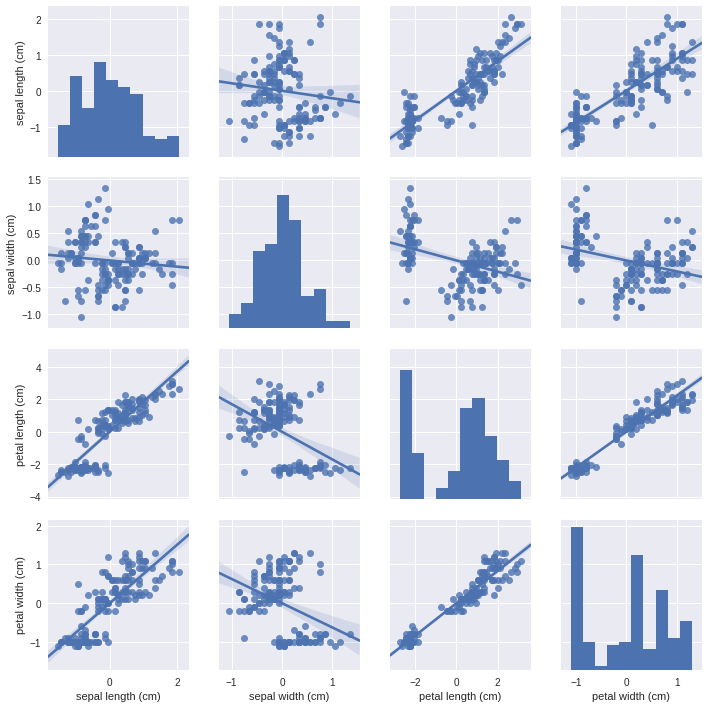

In [34]:
sns.pairplot(X_c, kind='reg')

In [35]:
X_c.cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.039268,1.273682,0.516904
sepal width (cm),-0.039268,0.188004,-0.321713,-0.117981
petal length (cm),1.273682,-0.321713,3.113179,1.296387
petal width (cm),0.516904,-0.117981,1.296387,0.582414


In [36]:
X.shape

(150, 4)

In [37]:
X.cov().shape

(4, 4)

In [38]:
X.cov()

,0,1,2,3
0,0.685694,-0.039268,1.273682,0.516904
1,-0.039268,0.188004,-0.321713,-0.117981
2,1.273682,-0.321713,3.113179,1.296387
3,0.516904,-0.117981,1.296387,0.582414
